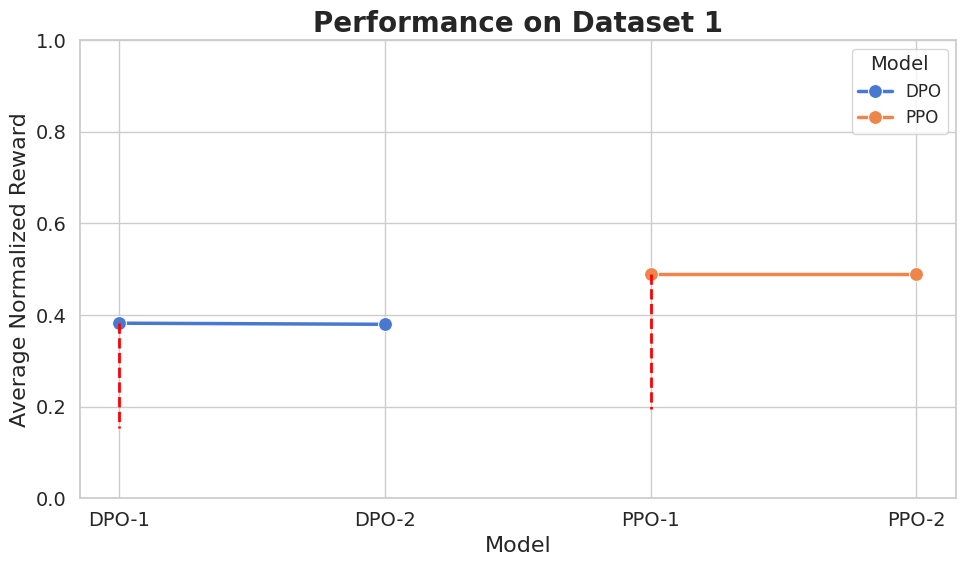

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data
data = [
    {"Task": "Constitution 1", "Model": "DPO-1", "Reward": 0.3823},
    {"Task": "Constitution 1", "Model": "PPO-1", "Reward": 0.4897},
    {"Task": "Constitution 2", "Model": "DPO-2", "Reward": 0.4749},
    {"Task": "Constitution 1", "Model": "DPO-2", "Reward": 0.3799},
    {"Task": "Constitution 2", "Model": "PPO-2", "Reward": 0.6079},
    {"Task": "Constitution 1", "Model": "PPO-2", "Reward": 0.4897},
]

# Create DataFrame
df = pd.DataFrame(data)

# Filter data for Constitution 1
df_dataset1 = df[df['Task'] == 'Constitution 1']

# Set style and palette
sns.set(style="whitegrid", palette="muted", font_scale=1.5)

# Begin plot
plt.figure(figsize=(10, 6))

# Plot lines for DPO and PPO models
for model_prefix in ['DPO', 'PPO']:
    df_model = df_dataset1[df_dataset1['Model'].str.startswith(model_prefix)]
    df_model = df_model.sort_values('Model')
    sns.lineplot(
        data=df_model,
        x='Model',
        y='Reward',
        marker='o',
        linewidth=2.5,
        markersize=10,
        label=model_prefix
    )
    # Calculate 60% drop point
    x_first = df_model['Model'].iloc[0]
    y_first = df_model['Reward'].iloc[0]
    y_drop = y_first * 0.4  # 60% drop

    # Get x-position of the first point
    ax = plt.gca()
    x_ticks = ax.get_xticks()
    x_labels = ax.get_xticklabels()
    x_positions = {label.get_text(): tick for label, tick in zip(x_labels, x_ticks)}
    x_pos = x_positions[x_first]

    # Plot red dashed line showing 60% drop
    plt.plot([x_pos, x_pos], [y_first, y_drop], color='red', linestyle='--', linewidth=2)

# Customize plot
plt.title('Performance on Dataset 1', fontsize=20, weight='bold')
plt.xlabel('Model', fontsize=16)
plt.ylabel('Average Normalized Reward', fontsize=16)
plt.ylim(0, 1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Model', title_fontsize=14, fontsize=12)

# Display plot
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd

# Define the data
data = [
    {"Task": "Constitution 1", "Model": "DPO-1", "Reward": 0.3823},
    {"Task": "DPO-Continual", "Model": "DPO-2", "Reward": 0.3799},
    {"Task": "Constitution 2", "Model": "DPO-2", "Reward": 0.4749},
    {"Task": "Constitution 1", "Model": "PPO-1", "Reward": 0.4897},
    {"Task": "PPO-Continual", "Model": "PPO-2", "Reward": 0.4897},
    {"Task": "Constitution 2", "Model": "PPO-2", "Reward": 0.6079},
]

# Create DataFrame
df = pd.DataFrame(data)

# Sort DataFrame by 'Model' and 'Task'
df = df.sort_values(by=['Model', 'Task'])

# Compute cumulative counts and sums for each model
df['Cumulative_Count'] = df.groupby('Model').cumcount() + 1
df['Cumulative_Sum'] = df.groupby('Model')['Reward'].cumsum()
df['Continual_Average_Reward'] = df['Cumulative_Sum'] / df['Cumulative_Count']

# Display the results
print(df[['Model', 'Task', 'Reward', 'Continual_Average_Reward']])

   Model            Task  Reward  Continual_Average_Reward
0  DPO-1  Constitution 1  0.3823                    0.3823
2  DPO-2  Constitution 2  0.4749                    0.4749
1  DPO-2   DPO-Continual  0.3799                    0.4274
3  PPO-1  Constitution 1  0.4897                    0.4897
5  PPO-2  Constitution 2  0.6079                    0.6079
4  PPO-2   PPO-Continual  0.4897                    0.5488
